In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import string
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('twitter_training.csv', header=None) 

df.columns = ['no.', 'account', 'sentiment', 'text']

In [3]:
print(df.head())

    no.      account sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [4]:
df.dropna(inplace=True)

In [5]:
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [6]:
df['cleaned_text'] = df['text'].apply(clean_text)
X = df['cleaned_text']
y = df['sentiment']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [8]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Evaluation on Test Set")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

validation_df = pd.read_csv('twitter_validation.csv', header=None)  # Adjust path and header as needed
validation_df.columns = ['no.', 'account', 'sentiment', 'text']  # Adjust column names according to your dataset
print(validation_df.head())

Evaluation on Test Set
              precision    recall  f1-score   support

  Irrelevant       0.85      0.61      0.71      2696
    Negative       0.70      0.86      0.78      4380
     Neutral       0.82      0.63      0.72      3605
    Positive       0.71      0.81      0.76      4119

    accuracy                           0.75     14800
   macro avg       0.77      0.73      0.74     14800
weighted avg       0.76      0.75      0.74     14800

[[1633  466  138  459]
 [  77 3782  169  352]
 [ 129  631 2289  556]
 [  91  496  181 3351]]
    no.    account   sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is s

In [10]:
validation_df.dropna(inplace=True)
validation_df['cleaned_text'] = validation_df['text'].apply(clean_text)
X_validation = validation_df['cleaned_text']
y_validation = validation_df['sentiment']
y_validation_pred = pipeline.predict(X_validation)

print("Evaluation on Validation Set")
print(classification_report(y_validation, y_validation_pred))
print(confusion_matrix(y_validation, y_validation_pred))
print("\nDataset Overview:")
print(df)

Evaluation on Validation Set
              precision    recall  f1-score   support

  Irrelevant       0.91      0.75      0.82       172
    Negative       0.76      0.91      0.83       266
     Neutral       0.93      0.74      0.83       285
    Positive       0.79      0.90      0.84       277

    accuracy                           0.83      1000
   macro avg       0.85      0.82      0.83      1000
weighted avg       0.84      0.83      0.83      1000

[[129  20   6  17]
 [  2 242   5  17]
 [  8  34 212  31]
 [  3  21   5 248]]

Dataset Overview:
        no.      account sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvid

C:\Users\prajwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


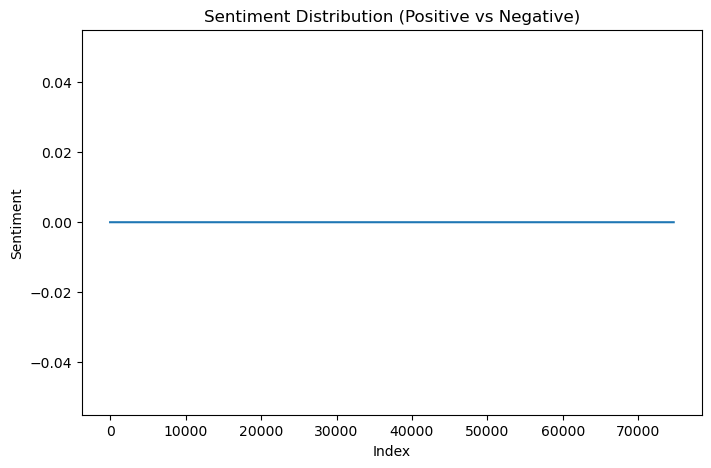

In [11]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=df.index, y=df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0))
plt.title('Sentiment Distribution (Positive vs Negative)')
plt.xlabel('Index')
plt.ylabel('Sentiment')
plt.show()

C:\Users\prajwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


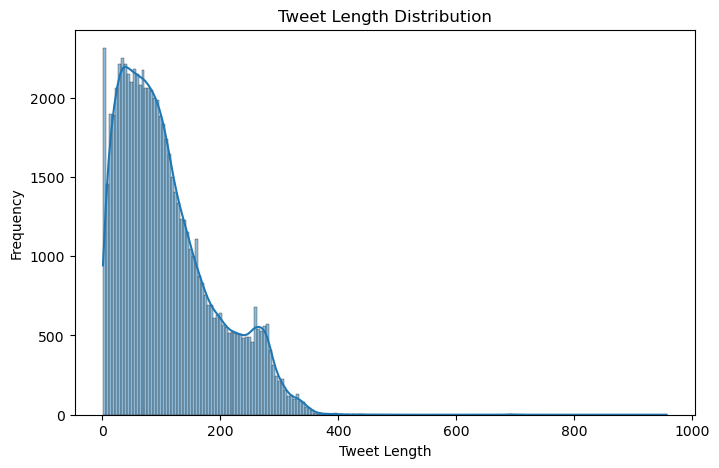

In [12]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [13]:
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(df['cleaned_text'])
word_counts_sum = word_counts.sum(axis=0)
words_freq = [(word, word_counts_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]
common_words_df = pd.DataFrame(words_freq, columns=['word', 'count'])

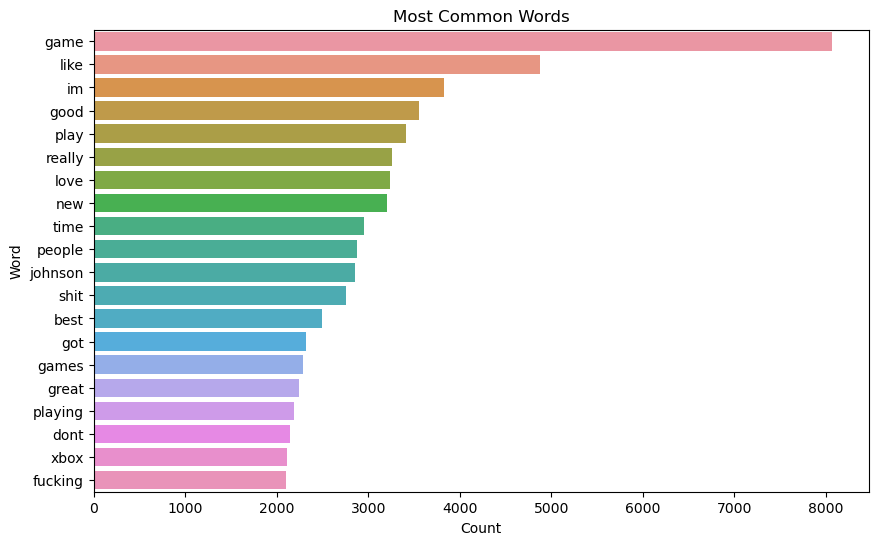

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [15]:
positive_text = df[df['sentiment'] == 'positive']['cleaned_text']
negative_text = df[df['sentiment'] == 'negative']['cleaned_text']

In [16]:
if len(positive_text) > 0:
    positive_vectorizer = CountVectorizer(stop_words='english')
    positive_word_counts = positive_vectorizer.fit_transform(positive_text)
    positive_word_counts_sum = positive_word_counts.sum(axis=0)
    positive_words_freq = [(word, positive_word_counts_sum[0, idx]) for word, idx in positive_vectorizer.vocabulary_.items()]
    positive_words_freq = sorted(positive_words_freq, key=lambda x: x[1], reverse=True)[:20]
    positive_common_words_df = pd.DataFrame(positive_words_freq, columns=['word', 'count'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='word', data=positive_common_words_df)
    plt.title('Most Common Words in Positive Tweets')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()
else:
    print("No positive text data available to analyze common words.")

No positive text data available to analyze common words.


In [17]:
if len(negative_text) > 0:
    negative_vectorizer = CountVectorizer(stop_words='english')
    negative_word_counts = negative_vectorizer.fit_transform(negative_text)
    negative_word_counts_sum = negative_word_counts.sum(axis=0)
    negative_words_freq = [(word, negative_word_counts_sum[0, idx]) for word, idx in negative_vectorizer.vocabulary_.items()]
    negative_words_freq = sorted(negative_words_freq, key=lambda x: x[1], reverse=True)[:20]
    negative_common_words_df = pd.DataFrame(negative_words_freq, columns=['word', 'count'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='word', data=negative_common_words_df)
    plt.title('Most Common Words in Negative Tweets')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()
else:
    print("No negative text data available to analyze common words.")

No negative text data available to analyze common words.
